<a href="https://colab.research.google.com/github/missZina/Gaussian-Filter-Median-Filter-Burring-Image/blob/master/Image_manipulation_and_processing_using_Numpy_and_Scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#
Opening and writing to image files
DisImage manipulation and processing using Numpy and Scipyplaying images
Basic manipulations
Statistical information
Geometrical transformations
Image filtering
Blurring/smoothing
Sharpening
Denoising
Mathematical morphology
Feature extraction
Edge detection
Segmentation


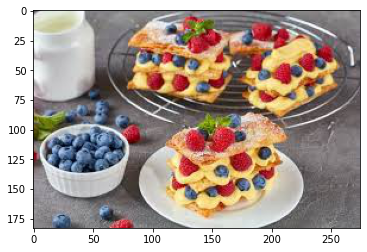

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc
import scipy.ndimage
import skimage.filters
import sklearn.metrics

# Display initial iage 
image1 = plt.imread('/content/drive/My Drive/image3.jpg')
plt.imshow(image1)

(183, 275, 3)


(-0.5, 274.5, 182.5, -0.5)

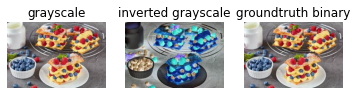

In [27]:
#Importing modules

import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc
import scipy.ndimage
import skimage.filters
import sklearn.metrics

#Ttraced manually by drawing up contours and filling them to obtain the ground truth by Loading and visualizing images in figure.
image = plt.imread('/content/drive/My Drive/image3.jpg')
print(image.shape)
plt.imshow(image, cmap=plt.cm.gray)  

grayscale = plt.imread('/content/drive/My Drive/image3.jpg')
grayscale = 255 - grayscale
groundtruth = plt.imread('/content/drive/My Drive/image3.jpg')
plt.subplot(1, 3, 1)
plt.imshow(255 - grayscale, cmap='gray')
plt.title('grayscale')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(grayscale, cmap='gray')
plt.title('inverted grayscale')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(groundtruth, cmap='gray')
plt.title('groundtruth binary')
plt.axis('off')
#


Text(0.5, 1.0, 'median filtered image')

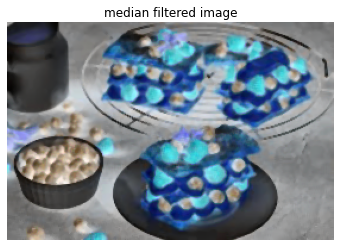

In [28]:
median_filtered = scipy.ndimage.median_filter(grayscale, size=3)
plt.imshow(median_filtered, cmap='gray')
plt.axis('off')
plt.title('median filtered image')

Text(0, 0.5, 'Count')

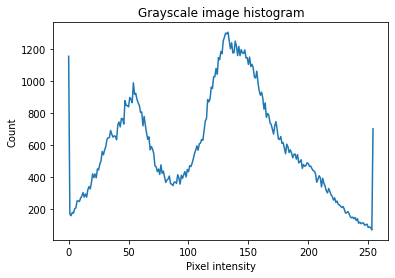

In [29]:
# Visualize histogram of the pixel Intensities
counts, vals = np.histogram(grayscale, bins=range(2 ** 8))
plt.plot(range(0, (2 ** 8) - 1), counts)
plt.title('Grayscale image histogram')
plt.xlabel('Pixel intensity')
plt.ylabel('Count')

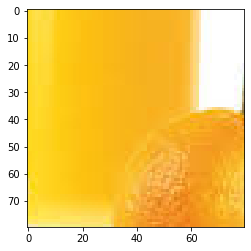

In [191]:
  
plt.imshow(image[100:180, 100:180], cmap=plt.cm.gray, interpolation='nearest')   


In [124]:
#Basic Manipulation 
face = image
face[0, 40]
# Slicing
face[10:13, 20:23]


array([[[202, 204, 157],
        [202, 204, 157],
        [201, 202, 158]],

       [[200, 199, 151],
        [200, 199, 153],
        [199, 198, 152]],

       [[198, 197, 149],
        [197, 196, 148],
        [197, 196, 150]]], dtype=uint8)

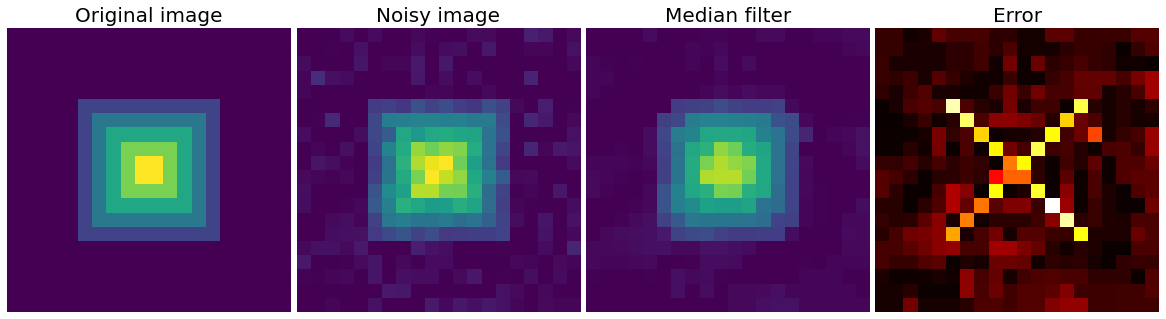

In [143]:
#image filters
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

im = np.zeros((20, 20))
im[5:-5, 5:-5] = 1
im = ndimage.distance_transform_bf(im)
im_noise = im + 0.2*np.random.randn(*im.shape)

im_med = ndimage.median_filter(im_noise, 3)

plt.figure(figsize=(16, 5))

plt.subplot(141)
plt.imshow(im, interpolation='nearest')
plt.axis('off')
plt.title('Original image', fontsize=20)
plt.subplot(142)
plt.imshow(im_noise, interpolation='nearest', vmin=0, vmax=5)
plt.axis('off')
plt.title('Noisy image', fontsize=20)
plt.subplot(143)
plt.imshow(im_med, interpolation='nearest', vmin=0, vmax=5)
plt.axis('off')
plt.title('Median filter', fontsize=20)
plt.subplot(144)
plt.imshow(np.abs(im - im_med), cmap=plt.cm.hot, interpolation='nearest')
plt.axis('off')
plt.title('Error', fontsize=20)


plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)

plt.show()


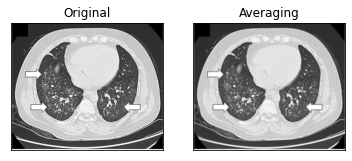

In [161]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img1 = cv2.imread('/content/drive/My Drive/data/train/CT_NonC/599.jpg')
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img1,-1,kernel)

plt.subplot(121),plt.imshow(img1),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

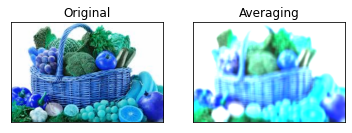

In [165]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img1 = cv2.imread('/content/drive/My Drive/image4.jpg')
kernel = np.ones((10,5),np.float32)/25
dst = cv2.filter2D(img1,-1,kernel)

plt.subplot(121),plt.imshow(img1),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

(223, 226, 3)


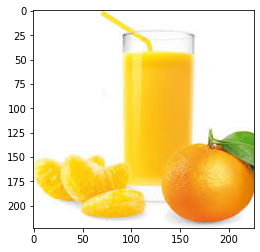

In [157]:
### UNDERSTAND IMAGE SEGMENTATION 

from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
image = plt.imread('/content/drive/My Drive/image5.jpg')
print(image.shape)
plt.imshow(image)



[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


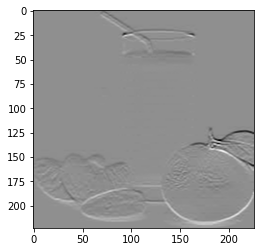

In [158]:
# Edges Detection
#It is a three-channel image (RGB). We need to convert it into grayscale so that we only have a single channel. Doing this will also help us get a better understanding of how the algorithm works.
#
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

#apply threshold to this image. This threshold should separate the image into two parts – the foreground and the background. Before we do that, let’s quickly check the shape of this image:

gray.shape
# After running we find The height and width of the image is 246 and  364 respectively

gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')
#The darker region (black) represents the background and the brighter (white) region is the foreground.
#We can define multiple thresholds as well to detect multiple objects
###
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')
#Edge detection works by convolving these filters over the given image
# converting to grayscale
gray = rgb2gray(image)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

#convolve this filter over the image using the convolve function of the ndimage package from scipy.
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
plt.imshow(out_h, cmap='gray')


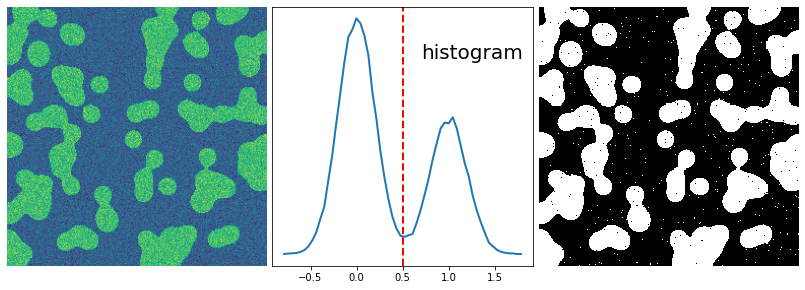

In [168]:
#Gaussian filter
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

np.random.seed(1)
n = 10
l = 256

im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))

mask = (im > im.mean()).astype(np.float)

mask += 0.1 * im

img = mask + 0.2*np.random.randn(*mask.shape)

hist, bin_edges = np.histogram(img, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

binary_img = img > 0.5

plt.figure(figsize=(11,4))

plt.subplot(131)
plt.imshow(img)
plt.axis('off')
plt.subplot(132)
plt.plot(bin_centers, hist, lw=2)
plt.axvline(0.5, color='r', ls='--', lw=2)
plt.text(0.57, 0.8, 'histogram', fontsize=20, transform = plt.gca().transAxes)
plt.yticks([])
plt.subplot(133)
plt.imshow(binary_img, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)
plt.show()

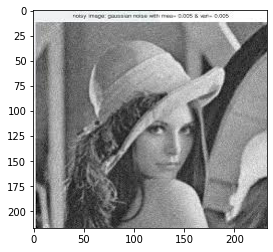

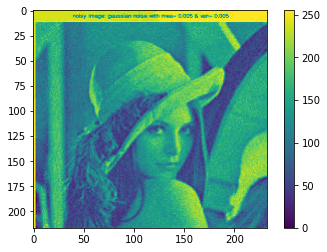

In [183]:
#blurring
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mp
img=plt.imread('/content/drive/My Drive/image10.jpg')
plt.imshow(img)
plt.show()
img2 = mp.imread('/content/drive/My Drive/image10.jpg') #converted img to array to png
blu = img2[:,:,0]
imgplot=plt.imshow(blu)
plt.colorbar()
plt.show()

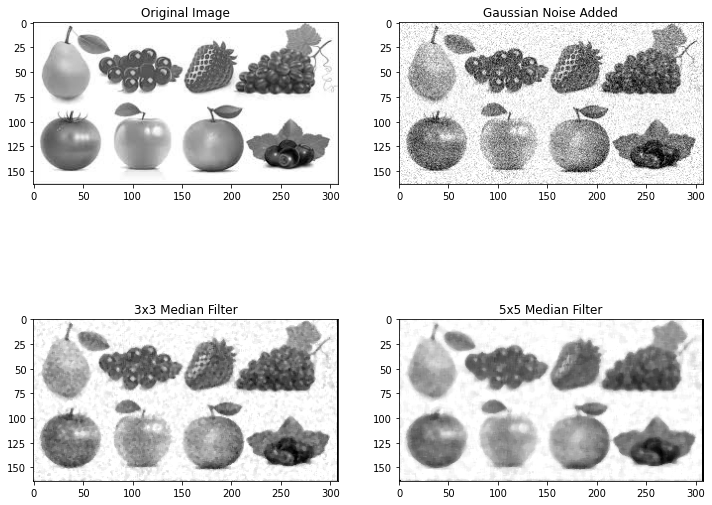

In [185]:
# Median Filter
import os
import numpy as np
import matplotlib.pyplot as plt

def median_filter(dat, kernel_size):
    temp = []
    indexer = kernel_size // 2
    dat_f = []
    dat_f = np.zeros((len(dat),len(data[0])))
    for i in range(len(dat)):

        for j in range(len(dat[0])):

            for z in range(kernel_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(kernel_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(kernel_size):
                            temp.append(dat[i + z - indexer][j + k - indexer])

            temp.sort()
            dat_f[i][j] = temp[len(temp) // 2]
            temp = []
    return dat_f

def add_gaussian_noise(img, sigma):
    gauss = np.random.normal(0, sigma, np.shape(img))
    noisy_img = img + gauss
    noisy_img[noisy_img < 0] = 0
    noisy_img[noisy_img > 255] = 255
    return noisy_img

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


if __name__ == '__main__':
    # Load image and convert it to gray scale
    file_name = os.path.join('/content/drive/My Drive/image8.jpg')
    img = rgb2gray(plt.imread(file_name))

    # Add Gaussian noise
    noisy_img = add_gaussian_noise(img, 30)

    # Apply Median Filter
    removed_noise_3 = median_filter(noisy_img, 3)
    removed_noise_5 = median_filter(noisy_img, 5)

    # Display results
    fig = plt.figure(figsize = (12, 10))
    display = [img, noisy_img, removed_noise_3, removed_noise_5]
    title = ['Original Image', 'Gaussian Noise Added', '3x3 Median Filter', '5x5 Median Filter']

    for i in range(len(display)):
        fig.add_subplot(2, 2, i+1)
        plt.imshow(display[i], cmap = 'gray')
        plt.title(title[i])
    
    plt.show()
